In [1]:
# prompt: start analysing dataset

import pandas as pd

# Replace 'your_dataset.csv' with the actual path to your dataset
df = pd.read_csv('blood_report_with_disease.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows of the dataset
print(df.head())

# Describe the numerical features of the dataset
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       500 non-null    int64  
 1   WBC      500 non-null    float64
 2   LYMp     500 non-null    float64
 3   MIDp     500 non-null    float64
 4   NEUTp    500 non-null    float64
 5   LYMn     500 non-null    float64
 6   MIDn     500 non-null    float64
 7   NEUTn    500 non-null    float64
 8   RBC      500 non-null    float64
 9   HGB      500 non-null    float64
 10  HCT      500 non-null    float64
 11  MCV      500 non-null    float64
 12  MCH      500 non-null    float64
 13  MCHC     500 non-null    float64
 14  RDWSD    500 non-null    float64
 15  RDWCV    500 non-null    float64
 16  PLT      500 non-null    float64
 17  MPV      500 non-null    float64
 18  PDW      500 non-null    float64
 19  PCT      500 non-null    float64
 20  PLCR     500 non-null    float64
 21  Disease  500 non

In [2]:
 print(df.columns)  # Print all column names to verify


Index(['ID', 'WBC', 'LYMp', 'MIDp', 'NEUTp', 'LYMn', 'MIDn', 'NEUTn', 'RBC',
       'HGB', 'HCT', 'MCV', 'MCH', 'MCHC', 'RDWSD', 'RDWCV', 'PLT', 'MPV',
       'PDW', 'PCT', 'PLCR', 'Disease'],
      dtype='object')


In [3]:
# Checking for Null Values
null_values = df.isnull().sum()
print(null_values)

ID         0
WBC        0
LYMp       0
MIDp       0
NEUTp      0
LYMn       0
MIDn       0
NEUTn      0
RBC        0
HGB        0
HCT        0
MCV        0
MCH        0
MCHC       0
RDWSD      0
RDWCV      0
PLT        0
MPV        0
PDW        0
PCT        0
PLCR       0
Disease    0
dtype: int64


Data Transformation


a. Scaling and Normalizing Numerical Data
To improve model performance, scale or normalize numerical columns. Here’s how to standardize them to have a mean of 0 and a standard deviation of 1:

In [7]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


b. Encoding Categorical Data
If Disease is a categorical column with class names, encode it as integers:

In [8]:
from sklearn.preprocessing import LabelEncoder

# Encoding Disease column
label_encoder = LabelEncoder()
df['Disease'] = label_encoder.fit_transform(df['Disease'])


Feature Engineering


a. Adding Derived Features
If useful, create additional features based on existing data. For example:

Red Cell Distribution Width (RDW) and Mean Platelet Volume (MPV) as a ratio:

In [10]:
# Calculate RDW to MPV ratio
print("Calculating RDW to MPV ratio...")

# Check for any zero values in MPV to avoid division errors
zero_mpv_count = (df['MPV'] == 0).sum()
if zero_mpv_count > 0:
    print(f"Warning: Found {zero_mpv_count} entries in 'MPV' with a value of 0. These will result in infinite values.")

# Perform the calculation and add it as a new column
df['RDW_to_MPV'] = df['RDWCV'] / df['MPV']

# Display a sample of the new column
print("\nSample values of 'RDW_to_MPV':")
print(df['RDW_to_MPV'].head())


Calculating RDW to MPV ratio...

Sample values of 'RDW_to_MPV':
0    4.345167
1    4.017067
2   -0.115426
3   -5.541347
4    1.543633
Name: RDW_to_MPV, dtype: float64


b. Feature Selection
To simplify your model, select the most relevant features:

In [12]:
from sklearn.feature_selection import SelectKBest, f_classif

# Selecting top 10 features based on their importance
print("Starting feature selection process...")

# Define features and target
X = df.drop(columns=['Disease'])  # Features
y = df['Disease']  # Target
print(f"Total features available for selection: {X.shape[1]}")

# Initialize SelectKBest with f_classif as the scoring function
selector = SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]
print(f"Top 10 selected features based on importance:\n{selected_features.tolist()}")

# Update the DataFrame to keep only selected features and the target
df = df[selected_features.union(['Disease'])]

# Confirm final columns in the updated DataFrame
print("\nUpdated DataFrame with selected features:")
print(df.head())


Starting feature selection process...
Total features available for selection: 10
Top 10 selected features based on importance:
['HGB', 'ID', 'LYMn', 'LYMp', 'MIDn', 'NEUTn', 'PLCR', 'PLT', 'RBC', 'WBC']

Updated DataFrame with selected features:
   Disease       HGB        ID      LYMn      LYMp      MIDn     NEUTn  \
0        0 -0.789593 -1.728590  1.132019  1.541028  0.033834 -0.030668   
1        0 -0.789593 -1.721662  1.085226  1.469992 -0.208529  0.034611   
2        0 -0.487273 -1.714734  0.149380  0.431097 -0.087347 -0.161226   
3        4 -1.412017 -1.707806 -0.037789  0.386700 -0.329710 -0.291783   
4        0 -2.016658 -1.700877 -0.131374  1.176971 -0.450891 -0.618178   

       PLCR       PLT       RBC       WBC  
0 -0.559205  0.288569 -0.480327  0.710204  
1 -0.951430  0.142484 -0.464413  0.710204  
2  0.589457 -0.376927 -0.207525 -0.046425  
3 -1.385680 -0.458085 -0.150691 -0.370694  
4 -0.209003  1.051454 -0.216618 -0.857098  


Exploratory Data Analysis (EDA)

EDA helps visualize distributions and correlations to identify insights.

a. Visualize Distributions of Key Features

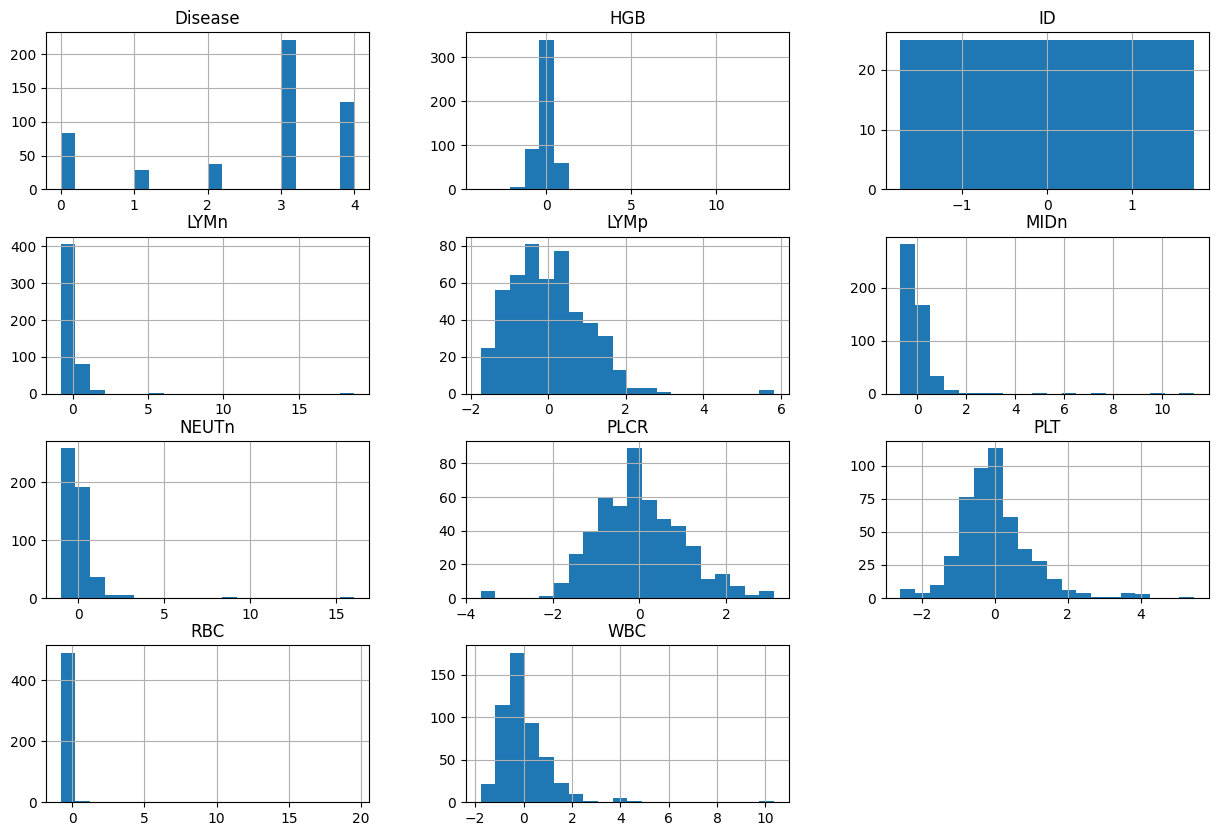

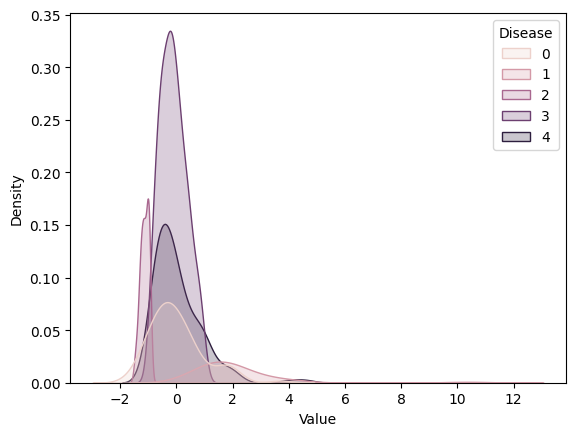

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for each feature
df.hist(bins=20, figsize=(15, 10))
plt.show()

# Reshape data for density plot using 'melt'
df_melted = df.melt(id_vars=['Disease'], value_vars=['WBC'], var_name='Measurement', value_name='Value')

# Density plot for a specific feature with melted data
sns.kdeplot(data=df_melted, x='Value', hue='Disease', fill=True)
plt.show()

b. Correlation Analysis
Heatmaps can reveal correlations between features.


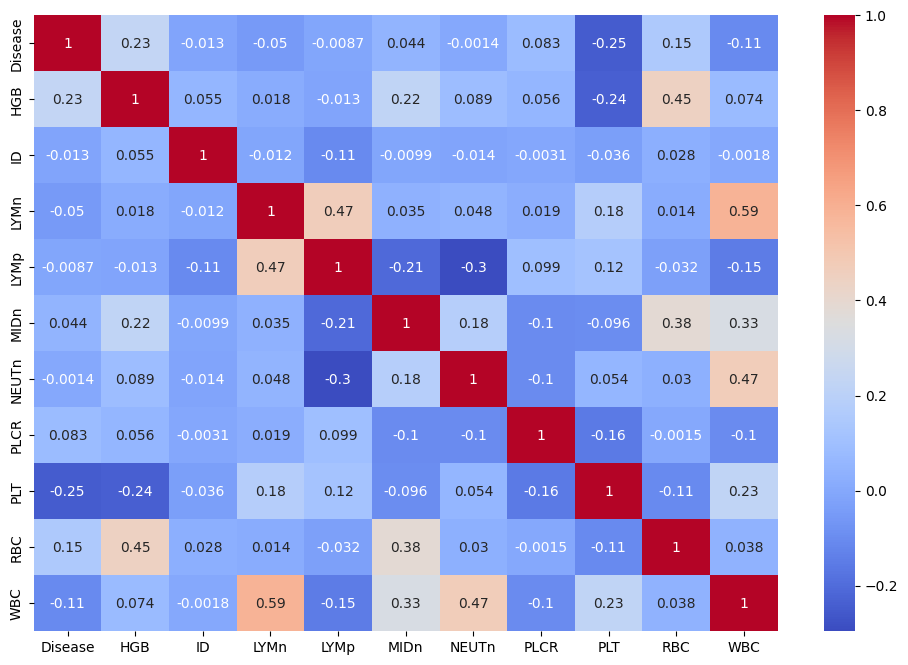

In [15]:
# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
import pickle

# Load the dataset
df = pd.read_csv("blood_report_with_disease.csv")

# Drop duplicates and irrelevant columns
df = df.drop_duplicates().drop(columns=['ID'])

# Separate features (X) and target (y)
X = df.drop(columns=['Disease'])
y = df['Disease']

# Encode target labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Save the list of all feature names
all_feature_names = X.columns.tolist()

# Feature selection - SelectKBest to reduce to top 5 features
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get selected feature names
selected_feature_names = X.columns[selector.get_support()].tolist()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply the selector to training and test data for consistency
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Initialize RandomForest with limited depth and estimators
rf = RandomForestClassifier(n_estimators=50, max_depth=3, random_state=42)

# Cross-validation for model accuracy estimation
cross_val_scores = cross_val_score(rf, X_train_selected, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (mean): {cross_val_scores.mean() * 100:.2f}%")

# Train the model
rf.fit(X_train_selected, y_train)

# Save model, selector, selected feature names, and all feature names together
with open("model_healthcheckpoints.pkl", "wb") as file:
    pickle.dump((rf, selector, selected_feature_names, all_feature_names), file)


Cross-validation accuracy (mean): 82.00%


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint

# Example model definition
model = Sequential([
    Dense(10, activation='relu', input_shape=(X_train.shape[1],)),  # replace X_train.shape[1] with actual input dimension
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Save checkpoints with the .keras extension
checkpoint = ModelCheckpoint('model_checkpoint.keras', save_best_only=True)

# Train the model with the checkpoint callback
model.fit(X_train, y_train, epochs=10, callbacks=[checkpoint])


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.0920 - loss: -21.2572
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0604 - loss: -46.0260  
Epoch 3/10
 1/13 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0312 - loss: -69.6622

/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/model_checkpoint.py:206: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0675 - loss: -67.2844 
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0777 - loss: -89.3926 
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0666 - loss: -126.0445 
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0686 - loss: -157.1337 
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0619 - loss: -205.6040 
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0649 - loss: -253.1083 
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0686 - loss: -300.0027 
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0530 - loss: -365.8648     


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Input
from keras.callbacks import ModelCheckpoint

# Step 3: Define a simple neural network model (customize if needed)
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Use Input layer here
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use softmax if it's multiclass classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step 4: Define the checkpoint callback to save weights in .weights.h5 format
checkpoint = ModelCheckpoint(filepath='model_weights_checkpoint.weights.h5',
                             save_best_only=True,
                             save_weights_only=True,
                             verbose=1)

# Step 5: Train the model with the checkpoint callback
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[checkpoint])


Epoch 1/10
2483/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0532 - loss: -7556000256.0000
Epoch 1: val_loss improved from inf to -103110098944.00000, saving model to model_weights_checkpoint.weights.h5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.0531 - loss: -7706791936.0000 - val_accuracy: 0.0501 - val_loss: -103110098944.0000
Epoch 2/10
2484/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0506 - loss: -193813299200.0000
Epoch 2: val_loss improved from -103110098944.00000 to -584773402624.00000, saving model to model_weights_checkpoint.weights.h5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0506 - loss: -194601828352.0000 - val_accuracy: 0.0501 - val_loss: -584773402624.0000
Epoch 3/10
2485/2500 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0533 - loss: -801584119808.0000
Epoch 3: val_loss improved from -584773402624.00000 to -1564256501760.00000, saving model to model_weights_checkpoint.weights.h5
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - ac

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset (replace with the actual file path if necessary)
df = pd.read_csv("blood_report_with_disease.csv")
print("Dataset loaded successfully.")

# Step 1: Drop non-relevant columns (if any other non-essential columns exist)
# Assuming 'ID' is not relevant for classification, we drop it
columns_to_drop = ['ID']
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')
print("Dropped irrelevant columns.")

# Step 2: Identify and encode categorical columns
# In this dataset, 'Disease' is the only categorical column we need to encode
label_encoder = LabelEncoder()
df_cleaned['Disease_encoded'] = label_encoder.fit_transform(df_cleaned['Disease'])
print("Target variable 'Disease' encoded.")

# Step 3: Split data into features (X) and target (y)
X = df_cleaned.drop(['Disease', 'Disease_encoded'], axis=1, errors='ignore')  # Drop 'Disease' text column and use encoded version
y = df_cleaned['Disease_encoded']

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data split into training and testing sets.")

# Step 5: Train an XGBoost model
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
print("XGBoost model trained.")

# Step 6: Model evaluation - predict and calculate accuracy
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Optional: Feature Importance
importances = xgb.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)
print("Feature importances:\n", feature_importances)


Dataset loaded successfully.
Dropped irrelevant columns.
Target variable 'Disease' encoded.
Features (X) shape: (500, 20)
Target (y) shape: (500,)
Data split into training and testing sets.


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [07:25:22] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost model trained.
Model accuracy: 100.00%
Feature importances:
    Feature  Importance
15     PLT    0.431296
7      RBC    0.340467
0      WBC    0.174375
9      HCT    0.011969
8      HGB    0.010758
12    MCHC    0.009573
6    NEUTn    0.004377
2     MIDp    0.003381
5     MIDn    0.003064
11     MCH    0.002348
14   RDWCV    0.002303
4     LYMn    0.001815
1     LYMp    0.001447
18     PCT    0.000859
3    NEUTp    0.000609
16     MPV    0.000485
10     MCV    0.000473
19    PLCR    0.000276
17     PDW    0.000124
13   RDWSD    0.000000


In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

# Load your dataset here (replace the path with the actual file)
df = pd.read_csv("blood_report_with_disease.csv")
# Step 6: Train a Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Step 7: Model evaluation - predict and calculate accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Model accuracy: {accuracy * 100:.2f}%")

Model accuracy: 99.00%


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import SelectKBest, f_classif

# Load dataset
df = pd.read_csv("blood_report_with_disease.csv")

# Check for duplicates and drop them
df = df.drop_duplicates()

# Separate features and target
X = df.drop(columns=['Disease'])  # Assuming 'Disease' is the target column
y = df['Disease']

# Encode target labels if they're categorical
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Feature selection to reduce dimensionality
selector = SelectKBest(score_func=f_classif, k=5)  # Try fewer features
X_selected = selector.fit_transform(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Switch to RandomForest with limited depth and fewer estimators
rf = RandomForestClassifier(
    n_estimators=50,       # Fewer trees
    max_depth=3,           # Shallow trees
    random_state=42
)

# Cross-validation to assess model performance on multiple folds
cross_val_scores = cross_val_score(rf, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy (mean): {cross_val_scores.mean() * 100:.2f}%")

# Train the RandomForest model
rf.fit(X_train, y_train)

# Model evaluation - predict and calculate accuracy
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy on test set: {accuracy * 100:.2f}%")

# Print classification report for more detailed performance metrics
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Cross-validation accuracy (mean): 82.00%
Model accuracy on test set: 85.00%
                  precision    recall  f1-score   support

          Anemia       0.60      0.19      0.29        16
    Leukocytosis       0.67      1.00      0.80         2
      Leukopenia       1.00      0.89      0.94         9
          Normal       0.84      1.00      0.91        48
Thrombocytopenia       0.89      0.96      0.92        25

        accuracy                           0.85       100
       macro avg       0.80      0.81      0.77       100
    weighted avg       0.83      0.85      0.82       100

